Figure saved at: C:\Users\parva\OneDrive\Desktop\Paper work\cnofs_EF\e_zonal_altitude_ranges_plot.png


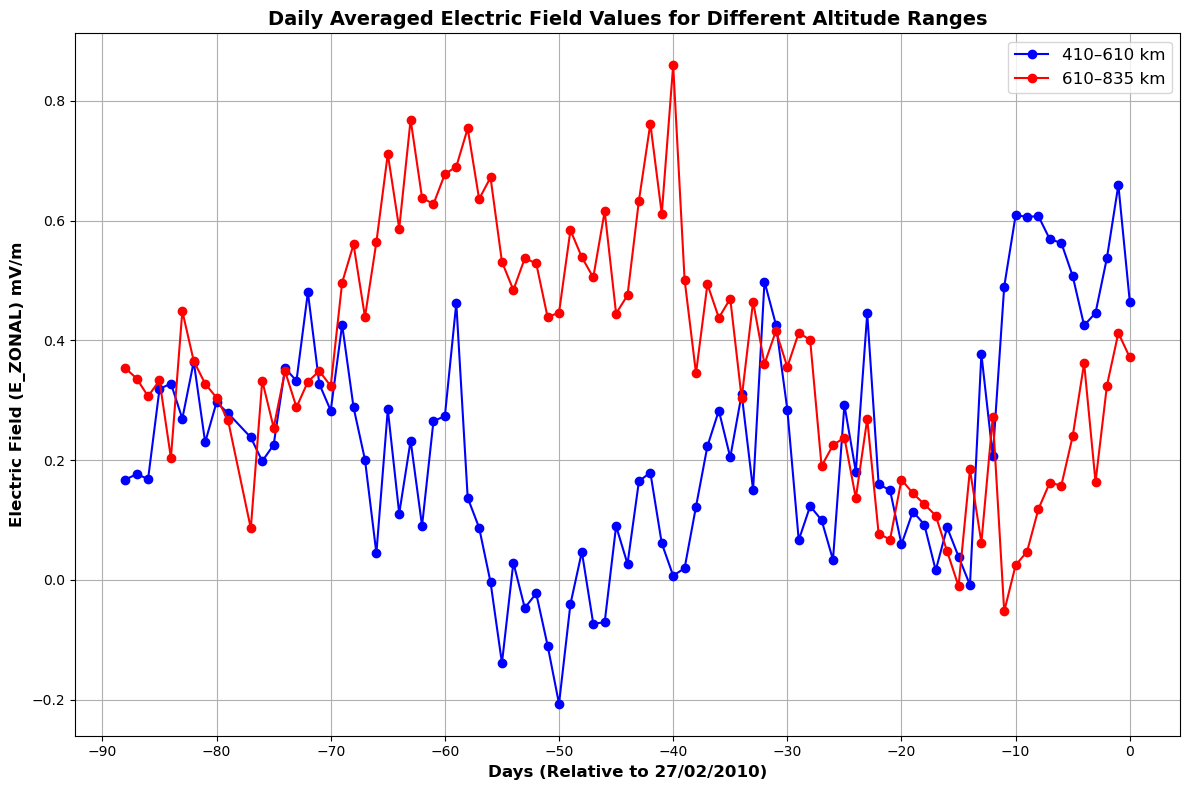

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Define the file path
file_path = r"C:\Users\parva\OneDrive\Desktop\Paper work\cnofs_EF\CNOFS_VEFI_EFIELD_1SEC_1092330 - Copy.txt"

# Define fixed column widths based on data structure
column_widths = [23, 19, 10, 15, 15]  # Adjust if needed based on your actual data format

# Define column names
column_names = ["EPOCH", "E_ZONAL", "LATITUDE", "LONGITUDE", "ALTITUDE"]

# Load the data using fixed widths
data = pd.read_fwf(file_path, widths=column_widths, names=column_names)

# Split the 'EPOCH' column into 'DATE' and 'TIME'
data['DATE'] = data['EPOCH'].str[:10]  # First 10 characters for date
data['TIME'] = data['EPOCH'].str[11:]  # Remaining characters for time

# Drop the original 'EPOCH' column and reorder columns
data = data[['DATE', 'TIME', 'E_ZONAL', 'LATITUDE', 'LONGITUDE', 'ALTITUDE']]

# Define the latitude and longitude ranges
latitude_min, latitude_max = -90, 18.66
longitude_min, longitude_max = 232.32, 341.88

# Filter data based on latitude and longitude ranges
filtered_data = data[
    (data['LATITUDE'] >= latitude_min) & (data['LATITUDE'] <= latitude_max) &
    (data['LONGITUDE'] >= longitude_min) & (data['LONGITUDE'] <= longitude_max)
]

# Ensure 'E_ZONAL' and 'ALTITUDE' are numeric, coercing any errors to NaN
filtered_data.loc[:, 'E_ZONAL'] = pd.to_numeric(filtered_data['E_ZONAL'], errors='coerce')
filtered_data.loc[:, 'ALTITUDE'] = pd.to_numeric(filtered_data['ALTITUDE'], errors='coerce')

# Define a reasonable threshold for valid E_ZONAL values
min_valid_value = -1e+25  # Set a minimum valid value based on expected range
max_valid_value = 1e+25   # Set a maximum valid value based on expected range

# Replace any values outside the valid range with NaN
filtered_data.loc[:, 'E_ZONAL'] = filtered_data['E_ZONAL'].where(
    (filtered_data['E_ZONAL'] >= min_valid_value) & (filtered_data['E_ZONAL'] <= max_valid_value), 
    None  # Replace invalid values with None (interpreted as NaN)
)

# Segregate data into two altitude ranges
range_1 = filtered_data[(filtered_data['ALTITUDE'] >= 410) & (filtered_data['ALTITUDE'] < 610)]
range_2 = filtered_data[(filtered_data['ALTITUDE'] >= 610) & (filtered_data['ALTITUDE'] <= 835)]

# Function to calculate daily averaged E_ZONAL values
def calculate_daily_avg(data):
    # Group by 'DATE' and calculate the mean of 'E_ZONAL'
    daily_avg = data.groupby('DATE')['E_ZONAL'].mean().reset_index()

    # Convert the 'DATE' column to datetime format
    daily_avg['DATE'] = pd.to_datetime(daily_avg['DATE'], format='%d-%m-%Y')

    # Sort data by 'DATE'
    daily_avg = daily_avg.sort_values(by='DATE')

    # Define the reference date (27/02/2010) as Day 0
    reference_date = datetime(2010, 2, 27)

    # Calculate the relative day for each entry based on the reference date
    daily_avg['RELATIVE_DAY'] = (daily_avg['DATE'] - reference_date).dt.days

    return daily_avg

# Calculate daily averages for each altitude range
daily_avg_range_1 = calculate_daily_avg(range_1)
daily_avg_range_2 = calculate_daily_avg(range_2)

# Plot the data for both altitude ranges
plt.figure(figsize=(12, 8))

# Plot for range 410–610 km
plt.plot(daily_avg_range_1['RELATIVE_DAY'], daily_avg_range_1['E_ZONAL'], 
         marker='o', linestyle='-', color='b', label='410–610 km')

# Plot for range 610–835 km
plt.plot(daily_avg_range_2['RELATIVE_DAY'], daily_avg_range_2['E_ZONAL'], 
         marker='o', linestyle='-', color='r', label='610–835 km')

# Set labels and title
plt.xlabel('Days (Relative to 27/02/2010)', fontsize=12, fontweight='bold')
plt.ylabel('Electric Field (E_ZONAL) mV/m', fontsize=12, fontweight='bold')
plt.title('Daily Averaged Electric Field Values for Different Altitude Ranges', fontsize=14, fontweight='bold')

# Customize x-axis to show days from -90 to 0
plt.xticks(range(-90, 1, 10))  # Show ticks from -90 to 0, with intervals of 10

# Add grid, legend, and layout adjustments
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Save the figure in the same directory as the input file
directory = os.path.dirname(file_path)
output_path = os.path.join(directory, "e_zonal_altitude_ranges_plot.png")
plt.savefig(output_path)

# Print confirmation
print(f"Figure saved at: {output_path}")
plt.show()


Figure saved at: C:\Users\parva\OneDrive\Desktop\Paper work\cnofs_EF\e_zonal_altitude_ranges_plot_4_ranges.png


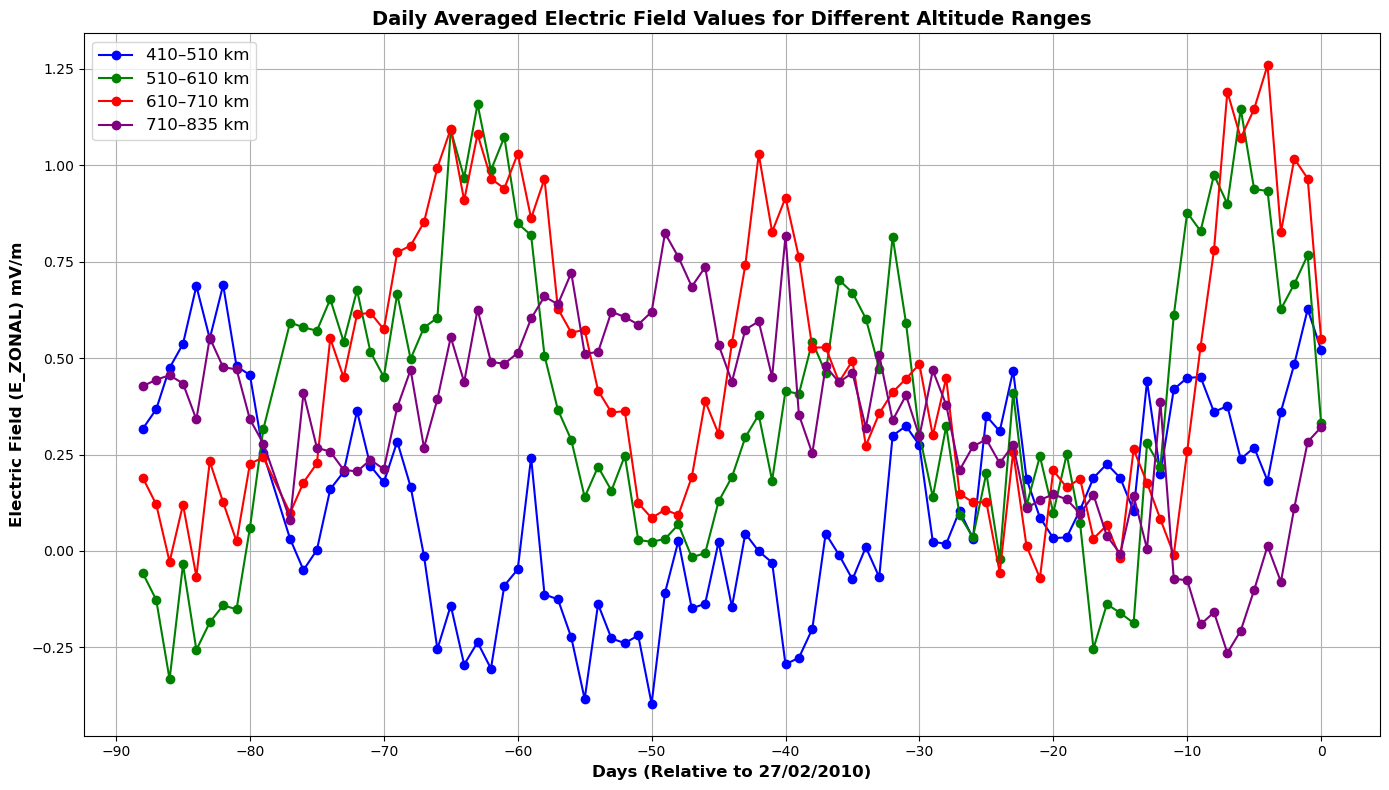

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os

# Define the file path
file_path = r"C:\Users\parva\OneDrive\Desktop\Paper work\cnofs_EF\CNOFS_VEFI_EFIELD_1SEC_1092330 - Copy.txt"

# Define fixed column widths based on data structure
column_widths = [23, 19, 10, 15, 15]  # Adjust if needed based on your actual data format

# Define column names
column_names = ["EPOCH", "E_ZONAL", "LATITUDE", "LONGITUDE", "ALTITUDE"]

# Load the data using fixed widths
data = pd.read_fwf(file_path, widths=column_widths, names=column_names)

# Split the 'EPOCH' column into 'DATE' and 'TIME'
data['DATE'] = data['EPOCH'].str[:10]  # First 10 characters for date
data['TIME'] = data['EPOCH'].str[11:]  # Remaining characters for time

# Drop the original 'EPOCH' column and reorder columns
data = data[['DATE', 'TIME', 'E_ZONAL', 'LATITUDE', 'LONGITUDE', 'ALTITUDE']]

# Define the latitude and longitude ranges
latitude_min, latitude_max = -90, 18.66
longitude_min, longitude_max = 232.32, 341.88

# Filter data based on latitude and longitude ranges
filtered_data = data[
    (data['LATITUDE'] >= latitude_min) & (data['LATITUDE'] <= latitude_max) &
    (data['LONGITUDE'] >= longitude_min) & (data['LONGITUDE'] <= longitude_max)
]

# Ensure 'E_ZONAL' and 'ALTITUDE' are numeric, coercing any errors to NaN
filtered_data.loc[:, 'E_ZONAL'] = pd.to_numeric(filtered_data['E_ZONAL'], errors='coerce')
filtered_data.loc[:, 'ALTITUDE'] = pd.to_numeric(filtered_data['ALTITUDE'], errors='coerce')

# Define a reasonable threshold for valid E_ZONAL values
min_valid_value = -1e+25  # Set a minimum valid value based on expected range
max_valid_value = 1e+25   # Set a maximum valid value based on expected range

# Replace any values outside the valid range with NaN
filtered_data.loc[:, 'E_ZONAL'] = filtered_data['E_ZONAL'].where(
    (filtered_data['E_ZONAL'] >= min_valid_value) & (filtered_data['E_ZONAL'] <= max_valid_value), 
    None  # Replace invalid values with None (interpreted as NaN)
)

# Segregate data into four altitude ranges
range_1 = filtered_data[(filtered_data['ALTITUDE'] >= 410) & (filtered_data['ALTITUDE'] < 510)]
range_2 = filtered_data[(filtered_data['ALTITUDE'] >= 510) & (filtered_data['ALTITUDE'] < 610)]
range_3 = filtered_data[(filtered_data['ALTITUDE'] >= 610) & (filtered_data['ALTITUDE'] < 710)]
range_4 = filtered_data[(filtered_data['ALTITUDE'] >= 710) & (filtered_data['ALTITUDE'] <= 835)]

# Function to calculate daily averaged E_ZONAL values
def calculate_daily_avg(data):
    # Group by 'DATE' and calculate the mean of 'E_ZONAL'
    daily_avg = data.groupby('DATE')['E_ZONAL'].mean().reset_index()

    # Convert the 'DATE' column to datetime format
    daily_avg['DATE'] = pd.to_datetime(daily_avg['DATE'], format='%d-%m-%Y')

    # Sort data by 'DATE'
    daily_avg = daily_avg.sort_values(by='DATE')

    # Define the reference date (27/02/2010) as Day 0
    reference_date = datetime(2010, 2, 27)

    # Calculate the relative day for each entry based on the reference date
    daily_avg['RELATIVE_DAY'] = (daily_avg['DATE'] - reference_date).dt.days

    return daily_avg

# Calculate daily averages for each altitude range
daily_avg_range_1 = calculate_daily_avg(range_1)
daily_avg_range_2 = calculate_daily_avg(range_2)
daily_avg_range_3 = calculate_daily_avg(range_3)
daily_avg_range_4 = calculate_daily_avg(range_4)

# Plot the data for all altitude ranges
plt.figure(figsize=(14, 8))

# Plot for range 410–510 km
plt.plot(daily_avg_range_1['RELATIVE_DAY'], daily_avg_range_1['E_ZONAL'], 
         marker='o', linestyle='-', color='b', label='410–510 km')

# Plot for range 510–610 km
plt.plot(daily_avg_range_2['RELATIVE_DAY'], daily_avg_range_2['E_ZONAL'], 
         marker='o', linestyle='-', color='g', label='510–610 km')

# Plot for range 610–710 km
plt.plot(daily_avg_range_3['RELATIVE_DAY'], daily_avg_range_3['E_ZONAL'], 
         marker='o', linestyle='-', color='r', label='610–710 km')

# Plot for range 710–835 km
plt.plot(daily_avg_range_4['RELATIVE_DAY'], daily_avg_range_4['E_ZONAL'], 
         marker='o', linestyle='-', color='purple', label='710–835 km')

# Set labels and title
plt.xlabel('Days (Relative to 27/02/2010)', fontsize=12, fontweight='bold')
plt.ylabel('Electric Field (E_ZONAL) mV/m', fontsize=12, fontweight='bold')
plt.title('Daily Averaged Electric Field Values for Different Altitude Ranges', fontsize=14, fontweight='bold')

# Customize x-axis to show days from -90 to 0
plt.xticks(range(-90, 1, 10))  # Show ticks from -90 to 0, with intervals of 10

# Add grid, legend, and layout adjustments
plt.grid(True)
plt.legend(fontsize=12)
plt.tight_layout()

# Save the figure in the same directory as the input file
directory = os.path.dirname(file_path)
output_path = os.path.join(directory, "e_zonal_altitude_ranges_plot_4_ranges.png")
plt.savefig(output_path)

# Print confirmation
print(f"Figure saved at: {output_path}")
plt.show()
